# Brennan etal 2019 - Figure 4: 

## Quantify distribution of trends during ETCW under different parameters: 

Katie Brennan  
October 2019  

Looking at the sensitivity of different values of inflation and localization on the trend during the ETCW relative to the satellite era.   


In [1]:
import pickle 
import numpy as np 
import matplotlib.pyplot as plt
import sys
from scipy import stats
plt.rcParams['figure.dpi']=200

In [2]:
sys.path.insert(1,'../')
import reanalysis_recons_utils as rrutils

Loading information from datasets.yml
Loading information from grid_def.yml
Loading information from datasets.yml
Loading information from grid_def.yml


In [3]:
import importlib
# #importlib.reload(LMRlite)
# #importlib.reload(LMR_config)
# importlib.reload(LMRlite)
importlib.reload(rrutils)

<module 'reanalysis_recons_utils' from '../reanalysis_recons_utils.py'>

In [4]:
anom_start = 1979
anom_end = 2013

### Load satellite data: 

In [5]:
# LOAD ANNUAL SATELLITE DATA: 
sat_start = 1979.0
sat_end = 2017

[fet_sia_anom, fet_sie_anom, fet_time] = rrutils.load_annual_satellite_anom(anom_end)
[fet_sia, fet_sie, fet_time2] = rrutils.load_annual_satellite()

sat_slope = rrutils.find_trend(fet_sie_anom, fet_time, anom_start,anom_end)

# plt.plot(fet_time,fet_sia_anom)
# plt.plot(fet_time,fet_sie_anom)

### Load Walsh

In [6]:
## LOAD ANNUAL WALSH DATA: 
walsh_start = 1850
walsh_end = 2013

[walsh_sia, walsh_sie, walsh_time] = rrutils.load_annual_walsh()

walsh_sia_anom = rrutils.find_anomalies(walsh_time, walsh_sia, anom_start,anom_end)
walsh_sie_anom = rrutils.find_anomalies(walsh_time, walsh_sie, anom_start,anom_end)

In [7]:
etcw_start = 1900
etcw_end = 1940

### Load MPI reconstructions: 

In [8]:
path = ('/home/disk/p/mkb22/nobackup/LMR_output/reanalysis_reconstruction_data/'+
        'annual/Brennan_etal_2019/full_reconstructions/mpi/')

chosen_dset = ['CRU']


# Includes all experiments within 1 SD of satellite
inf_name = ['1_8']
loc = [15000]
iteration = ['a','b','c','d','e']

filenames_mpi = {}
name_dict_mpi = {}
tot=0
           
for nit,it in enumerate(iteration):
    filenames_mpi[tot] = ('sic_mpi_annual_recon_1850_2018_cru_gis_be_R0_4_10deg_inf'+
               inf_name[0]+'_loc'+str(loc[0])+it+'.pkl')

    name_dict_mpi[tot] = ('MPI R0.4 inf'+inf_name[0]+' loc'+str(loc[0])+' '+it)
    tot = tot+1

In [9]:
sia_anom_mpi={}
sia_97_5_mpi={}
sia_2_5_mpi={}
sie_anom_mpi={}
sie_97_5_mpi={}
sie_2_5_mpi={}
recon_years_all_mpi={}
sie_ens_full_mpi= {}

for n,name in enumerate(name_dict_mpi):
    [sia_anom_mpi[name_dict_mpi[n]], 
     sia_97_5_mpi[name_dict_mpi[n]], 
     sia_2_5_mpi[name_dict_mpi[n]], 
     sie_anom_mpi[name_dict_mpi[n]], 
     sie_97_5_mpi[name_dict_mpi[n]], 
     sie_2_5_mpi[name_dict_mpi[n]], 
     recon_years_all_mpi[name_dict_mpi[n]],
     sie_ens_full_mpi[name_dict_mpi[n]]] = rrutils.load_recon_sie_95(path+filenames_mpi[n],chosen_dset,
                                                                     anom_start,anom_end)

In [10]:
for n,name in enumerate(name_dict_mpi):
    timei = np.array(recon_years_all_mpi[name_dict_mpi[n]][chosen_dset[0]])

    sat_loc = np.where(timei>int(sat_start-1))
    etcw_loc = np.where((timei>etcw_start-1)&(timei<etcw_end+1))

    sat_hold = sie_ens_full_mpi[name_dict_mpi[n]][chosen_dset[0]][sat_loc[0],:]
    etcw_hold = sie_ens_full_mpi[name_dict_mpi[n]][chosen_dset[0]][etcw_loc[0],:]

    if n is 0: 
        sie_ens_full_mpi_sat = np.zeros((sat_hold.shape[0],sat_hold.shape[1],len(iteration)))
        sie_ens_full_mpi_etcw = np.zeros((etcw_hold.shape[0],etcw_hold.shape[1],len(iteration)))

    sie_ens_full_mpi_sat[:,:,n] = sat_hold
    sie_ens_full_mpi_etcw[:,:,n] = etcw_hold

### Load CCSM4 reconstructions: 

In [11]:
path_ccsm4 = ('/home/disk/p/mkb22/nobackup/LMR_output/reanalysis_reconstruction_data/'+
              'annual/Brennan_etal_2019/full_reconstructions/ccsm4/')

chosen_dset = ['CRU']

# Includes all experiments that are withing 1 SD of satellite
inf_name = ['2_6']
loc = [15000]
iteration_ccsm4 = ['a','b','c','d','e']

filenames_ccsm4 = {}
name_dict_ccsm4 = {}
tot=0
           
for nit,it in enumerate(iteration_ccsm4):
    filenames_ccsm4[tot] = ('sic_ccsm4_annual_recon_1850_2018_cru_gis_be_R0_4_10deg_inf'+
                            inf_name[0]+'_loc'+str(loc[0])+it+'.pkl')

    name_dict_ccsm4[tot] = ('CCSM4 R0.4 inf'+inf_name[0]+' loc'+str(loc[0])+' '+it)
    tot = tot+1

In [12]:
sia_anom_ccsm4={}
sia_97_5_ccsm4={}
sia_2_5_ccsm4={}
sie_anom_ccsm4={}
sie_97_5_ccsm4={}
sie_2_5_ccsm4={}
recon_years_all_ccsm4={}
sie_ens_full_ccsm4= {}

for n,name in enumerate(name_dict_ccsm4):
    [sia_anom_ccsm4[name_dict_ccsm4[n]], 
     sia_97_5_ccsm4[name_dict_ccsm4[n]], 
     sia_2_5_ccsm4[name_dict_ccsm4[n]], 
     sie_anom_ccsm4[name_dict_ccsm4[n]], 
     sie_97_5_ccsm4[name_dict_ccsm4[n]], 
     sie_2_5_ccsm4[name_dict_ccsm4[n]], 
     recon_years_all_ccsm4[name_dict_ccsm4[n]],
     sie_ens_full_ccsm4[name_dict_ccsm4[n]]] = rrutils.load_recon_sie_95(path_ccsm4+filenames_ccsm4[n],
                                                                         chosen_dset,anom_start,anom_end)

In [13]:
for n,name in enumerate(name_dict_ccsm4):
    timei = np.array(recon_years_all_ccsm4[name_dict_ccsm4[n]][chosen_dset[0]])

    sat_loc = np.where(timei>sat_start-1)
    etcw_loc = np.where((timei>etcw_start-1)&(timei<etcw_end+1))

    sat_hold = sie_ens_full_ccsm4[name_dict_ccsm4[n]][chosen_dset[0]][sat_loc[0],:]
    etcw_hold = sie_ens_full_ccsm4[name_dict_ccsm4[n]][chosen_dset[0]][etcw_loc[0],:]

    if n is 0: 
        sie_ens_full_ccsm4_sat = np.zeros((sat_hold.shape[0],sat_hold.shape[1],len(iteration_ccsm4)))
        sie_ens_full_ccsm4_etcw = np.zeros((etcw_hold.shape[0],etcw_hold.shape[1],len(iteration_ccsm4)))

    sie_ens_full_ccsm4_sat[:,:,n] = sat_hold
    sie_ens_full_ccsm4_etcw[:,:,n] = etcw_hold

In [14]:
cru_start = recon_years_all_ccsm4[name_dict_ccsm4[n]][chosen_dset[0]][0]
cru_end = recon_years_all_ccsm4[name_dict_ccsm4[n]][chosen_dset[0]][-1]

etcw_time = np.arange(etcw_start,etcw_end+1)
recon_sat_time = np.arange(sat_start,cru_end,1)

In [15]:
sie_allit_ccsm4_sat = np.reshape(sie_ens_full_ccsm4_sat,(sie_ens_full_ccsm4_sat.shape[0],
                                 sie_ens_full_ccsm4_sat.shape[1]*len(iteration_ccsm4)))
sie_allit_mpi_sat = np.reshape(sie_ens_full_mpi_sat,(sie_ens_full_mpi_sat.shape[0],
                               sie_ens_full_mpi_sat.shape[1]*len(iteration)))

sie_allit_ccsm4_etcw = np.reshape(sie_ens_full_ccsm4_etcw,(sie_ens_full_ccsm4_etcw.shape[0],
                                 sie_ens_full_ccsm4_etcw.shape[1]*len(iteration_ccsm4)))
sie_allit_mpi_etcw = np.reshape(sie_ens_full_mpi_etcw,(sie_ens_full_mpi_etcw.shape[0],
                               sie_ens_full_mpi_etcw.shape[1]*len(iteration))) 

## Multiple endpoints: 


For each of the 6 experiments, I want to calculate the trend using 5 different start/end points. 


In [16]:
length = 25
sat_range_start = np.arange(1979,2017-length,1)
sat_range_end = np.arange(1979+length,2017,1)

start_etcw_range = np.arange(1910,1941-length,1)
end_etcw_range = np.arange(1910+length,1941,1)

In [17]:
sat_slope_all_endpts = np.zeros(len(sat_range_start))

for t,time in enumerate(sat_range_start):
    sat_slope_all_endpts[t] = rrutils.find_trend(fet_sie_anom,fet_time,
                                                 sat_range_start[t],sat_range_end[t])

### Walsh: 

In [18]:
# ETCW period: 
slope_exp_rang_walsh_etcw = np.zeros(len(start_etcw_range))

for t in range(len(start_etcw_range)):
    slope_exp_rang_walsh_etcw[t] = rrutils.find_trend(walsh_sie_anom,walsh_time,
                                                      start_etcw_range[t]+8,end_etcw_range[t]+8)
    
# SATELLITE period 
slope_exp_rang_walsh_sat = np.zeros(len(sat_range_start))

for t in range(len(sat_range_start)):
    slope_exp_rang_walsh_sat[t] = rrutils.find_trend(walsh_sie_anom,walsh_time,
                                                     sat_range_start[t],sat_range_end[t])

In [19]:
# plt.hist(sat_slope_all_endpts)
# plt.hist(slope_exp_rang_walsh_sat)
# plt.axvline(np.nanmean(sat_slope_all_endpts))

### CCSM4: 

In [20]:
#ETCW
slope_exp_rang_ccsm4_etcw = []
slope_all_enpts_ccsm4_etcw = {}
hold = np.zeros((len(start_etcw_range),))

for it in range(len(name_dict_ccsm4)*200):
    hold = np.zeros((len(start_etcw_range)))
    for t in range(len(start_etcw_range)):
        hold[t] = rrutils.find_trend(sie_allit_ccsm4_etcw[:,it],etcw_time,
                                     start_etcw_range[t],end_etcw_range[t])
    slope_exp_rang_ccsm4_etcw.append(hold)
slope_all_enpts_ccsm4_etcw = np.reshape(np.array(slope_exp_rang_ccsm4_etcw),
                                        (len(start_etcw_range)*200*len(name_dict_ccsm4)))

#Satellite period
slope_exp_rang_ccsm4_sat = []
slope_all_enpts_ccsm4_sat = {}
hold = np.zeros((len(sat_range_start)))

for it in range(len(name_dict_ccsm4)*200):
    hold = np.zeros((len(sat_range_start)))
    for t in range(len(sat_range_start)):
        hold[t] = rrutils.find_trend(sie_allit_ccsm4_sat[:,it],recon_sat_time,
                                     sat_range_start[t],sat_range_end[t])
    slope_exp_rang_ccsm4_sat.append(hold)
slope_all_enpts_ccsm4_sat = np.reshape(np.array(slope_exp_rang_ccsm4_sat),
                                 (len(sat_range_start)*200*len(name_dict_ccsm4)))

### MPI:

In [21]:
#ETCW: 
slope_exp_rang_mpi_etcw = []
slope_all_enpts_mpi_etcw = {}
hold = np.zeros((len(start_etcw_range)))

for it in range(len(name_dict_mpi)*200):
    hold = np.zeros((len(start_etcw_range)))
    for t in range(len(start_etcw_range)):
        hold[t] = rrutils.find_trend(sie_allit_mpi_etcw[:,it],etcw_time,
                                     start_etcw_range[t],end_etcw_range[t])
    slope_exp_rang_mpi_etcw.append(hold)
slope_all_enpts_mpi_etcw = np.reshape(np.array(slope_exp_rang_mpi_etcw),
                                      (len(start_etcw_range)*200*len(name_dict_mpi)))

#Satellite period
slope_exp_rang_mpi_sat = []
slope_all_enpts_mpi_sat = {}
hold = np.zeros((len(sat_range_start)))

for it in range(len(name_dict_mpi)*200):
    hold = np.zeros((len(sat_range_start)))
    for t in range(len(sat_range_start)):
        hold[t] = rrutils.find_trend(sie_allit_mpi_sat[:,it],recon_sat_time,
                                     sat_range_start[t],sat_range_end[t])
    slope_exp_rang_mpi_sat.append(hold)
slope_all_enpts_mpi_sat = np.reshape(np.array(slope_exp_rang_mpi_sat),
                                 (len(sat_range_start)*200*len(name_dict_mpi)))

In [22]:
def sat_etcw_histogram_leg(slope_all_enpts_etcw,slope_all_enpts_sat,slope_exp_rang_walsh_sat,
                           sat_slope_all_endpts,prior,name_dict,COLOR,labels=False):
    binwidth=0.002

    #plt.figure(figsize=(10,8))

    # RECONSTRUCTIONS:-------------------
    hist_kwargs = dict(histtype='step',linewidth=2)
    
    plt.hist(slope_all_enpts_sat,color=COLOR,density=True,
             bins=np.arange(min(slope_all_enpts_sat),max(slope_all_enpts_sat) + binwidth, binwidth),
             **hist_kwargs)
    plt.hist(slope_all_enpts_etcw,facecolor=COLOR,edgecolor=COLOR,
             fill=True,density=True,alpha=0.6,
             bins=np.arange(min(slope_all_enpts_etcw),max(slope_all_enpts_etcw) + binwidth, binwidth),
             **hist_kwargs)

    #Walsh data:-----------------------
    plt.hist(slope_exp_rang_walsh_sat, color='k', density=False,**hist_kwargs)
    plt.hist(slope_exp_rang_walsh_etcw,density=False, facecolor='k',
             edgecolor='k', alpha=0.4, fill=True, **hist_kwargs,
             bins=np.arange(min(slope_exp_rang_walsh_etcw),
                            max(slope_exp_rang_walsh_etcw) + binwidth, binwidth))

    #SATELLITE data:-----------------------
    plt.hist(sat_slope_all_endpts, color='mediumorchid',density=False,**hist_kwargs)

    # LINES: ----------------------------------------------------
    ln_kwargs = dict(linestyle='-',linewidth=4)
    plt.axvline(np.nanmean(sat_slope_all_endpts),color='m',**ln_kwargs)
   # plt.axvline(np.nanmean(sat_slope),color='crimson',**ln_kwargs)
    plt.axvline(np.nanmean(slope_exp_rang_walsh_sat),color='k',linestyle='-',linewidth=4)
    #plt.axvline(np.nanmean(slope_all_enpts_sat),color=COLOR,**ln_kwargs)
    
    #plt.axvline(np.nanmean(slope_all_enpts_etcw),linewidth=4,color=COLOR,linestyle='--')
    plt.axvline(np.nanmean(slope_exp_rang_walsh_etcw),color='k',linestyle='--',linewidth=3)
    
    if labels is True:
        from matplotlib.patches import Patch
        from matplotlib.lines import Line2D
        
        ds_labels = {'Satellite data \n (Fetterer etal 2017)':'m','Reconstruction (CCSM4 prior)':'sienna',
                     'Reconstruction (MPI prior)':'royalblue','Walsh etal 2017':'k'}
        ln_labels = {'Satellite era mean trend':'solid', 'ETCW mean trend':'dashed'}
        hist_labels = {'Satellite era trends':'w', 'Early 20th century warming\n (ETCW) trends':'grey'}
        
        hist_handles = []
        symbol_kwargs = dict(color='grey',linewidth=3)
        
        for d,ds in enumerate(ds_labels):
            hist_handles.append(Patch(color=ds_labels[ds], label=ds))
            if d is 3:
                hist_handles.append(Line2D([0],[0],color="w"))
        for h,hist in enumerate(hist_labels):
            hist_handles.append(Patch(facecolor=hist_labels[hist],edgecolor='grey',
                                      label=hist, linewidth=2))
            if h is 1:
                hist_handles.append(Line2D([0],[0],color="w"))
        for ln in ln_labels:
            hist_handles.append(Line2D([0], [0], marker='_',linestyle=ln_labels[ln],
                                label=ln, **symbol_kwargs))
#        hist_handles.append(Line2D([0], [0], marker='_',linestyle='-',label=ln, **symbol_kwargs))
            
        leg = plt.legend(handles=hist_handles, fontsize=16, frameon=False, 
                         bbox_to_anchor=(1,1)) #loc='upper left')
        
        for text in leg.get_texts():
            if text.get_text() in ds_labels:
                text.set_color(ds_labels[text.get_text()])

    plt.xticks(np.arange(-0.10,0.01,0.01),fontsize=12)
    plt.yticks(fontsize=16)

    plt.xlim(-0.1,-0.005)
    plt.ylim(0,45)

In [24]:
# Kolmogorov-Smirnov 2 sample test for MPI: 
KS_mpi = stats.ks_2samp(slope_all_enpts_mpi_sat, slope_all_enpts_mpi_etcw)
print('MPI: KS stat = '+str(np.round(KS_mpi[0],3)))
print('MPI: p-value = '+str(KS_mpi[1]))
KS_mpi

MPI: KS stat = 0.474
MPI: p-value = 0.0


Ks_2sampResult(statistic=0.47423076923076923, pvalue=0.0)

In [25]:
# Kolmogorov-Smirnov 2 sample test for CCSM4: 
KS_ccsm4 = stats.ks_2samp(slope_all_enpts_ccsm4_sat,
                          slope_all_enpts_ccsm4_etcw)
print('CCSM4: KS stat = '+str(np.round(KS_ccsm4[0],3)))
print('CCSM4: p-value = '+str(KS_ccsm4[1]))
KS_ccsm4

CCSM4: KS stat = 0.46
CCSM4: p-value = 0.0


Ks_2sampResult(statistic=0.4603205128205128, pvalue=0.0)

In [26]:
stats.percentileofscore(slope_all_enpts_mpi_etcw, np.nanmean(slope_exp_rang_walsh_etcw))

97.78333333333333

In [27]:
stats.percentileofscore(slope_all_enpts_ccsm4_etcw, np.nanmean(slope_exp_rang_walsh_etcw))

98.68333333333334

In [28]:
np.nanmean(slope_all_enpts_mpi_sat)/np.nanmean(slope_all_enpts_mpi_etcw)

1.3857845303667287

In [29]:
np.nanmean(slope_all_enpts_ccsm4_sat)/np.nanmean(slope_all_enpts_ccsm4_etcw)

1.326900747486661

In [30]:
np.median(slope_all_enpts_mpi_sat)/np.median(slope_all_enpts_mpi_etcw)

1.3803598478692518

In [31]:
np.median(slope_all_enpts_ccsm4_sat)/np.median(slope_all_enpts_ccsm4_etcw)

1.3262744169318739

In [33]:
bplot_data = [slope_exp_rang_walsh_etcw,slope_exp_rang_walsh_sat,sat_slope_all_endpts]
#plt.boxplot(bplot_data)

Text(0.5,1,'25 year trends in total Arctic sea-ice extent')

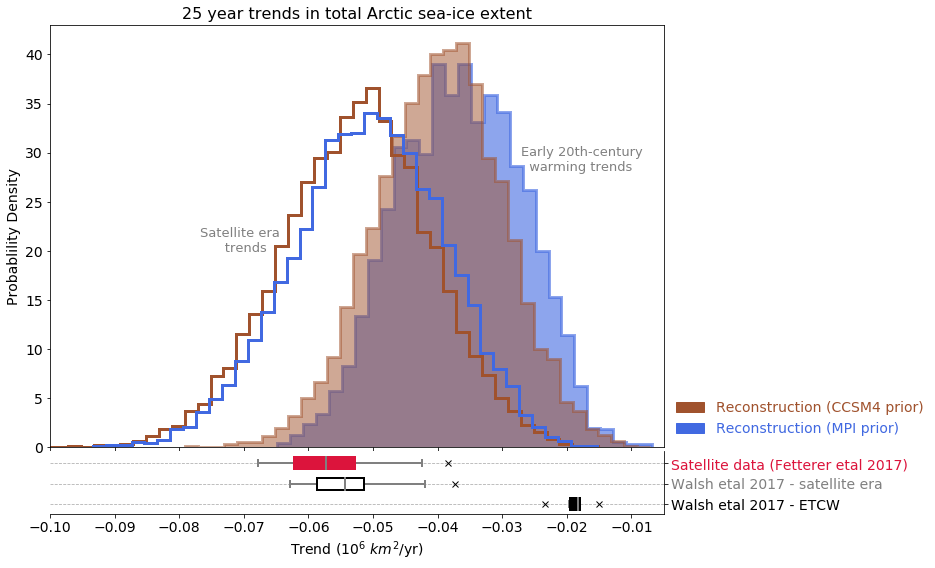

In [39]:
fig, (ax_hist,ax_box) = plt.subplots(2, sharex=True, figsize=(11,9),
                                    gridspec_kw={"height_ratios": (.87,.13)})
binwidth=0.002

ax_box.spines['top'].set_visible(False)
#ax_box.spines['right'].set_visible(False)
ax_box.spines['left'].set_visible(False)
#ax_box.spines['bottom'].set_visible(False)
#ax_hist.spines['top'].set_visible(False)

bplot_data = [slope_exp_rang_walsh_etcw,slope_exp_rang_walsh_sat,sat_slope_all_endpts]

medianprops = {'color': 'gray', 'linewidth': 2}
boxprops = {'color': 'gray', 'linestyle': '-', 'linewidth':2}
whiskerprops = {'color': 'gray', 'linestyle': '-','linewidth':2}
capprops = {'color': 'gray', 'linestyle': '-','linewidth':2}
flierprops = {'color': 'grey', 'marker': 'x','linewidth':2}

box = ax_box.boxplot(bplot_data, vert=False,widths=0.6,patch_artist=True,
                    medianprops=medianprops,boxprops=boxprops,whiskerprops=whiskerprops,
                    capprops=capprops,flierprops=flierprops)
ax_box.set_yticklabels(['Walsh etal 2017 - ETCW',
                        'Walsh etal 2017 - satellite era',
                        'Satellite data (Fetterer etal 2017)'], fontsize=14)

colors = ['k','w','crimson']
colorse = ['k','k','crimson']

for patch, c in zip(box['boxes'],enumerate(colors)):
    patch.set_facecolor(colors[c[0]])
    patch.set_edgecolor(colorse[c[0]])
    #medianprops = {'color': 'magenta', 'linewidth': 2}

hist_kwargs = dict(histtype='step',linewidth=3)


ax_hist.hist(slope_all_enpts_mpi_etcw,facecolor='royalblue',edgecolor='royalblue',
             fill=True,density=True,alpha=0.6,
             bins=np.arange(min(slope_all_enpts_mpi_etcw),max(slope_all_enpts_mpi_etcw) + binwidth, binwidth),
             **hist_kwargs)
ax_hist.hist(slope_all_enpts_ccsm4_etcw,facecolor='sienna',edgecolor='sienna',
             fill=True,density=True,alpha=0.5,
             bins=np.arange(min(slope_all_enpts_ccsm4_etcw),max(slope_all_enpts_ccsm4_etcw) + binwidth, binwidth),
             **hist_kwargs)

ax_hist.hist(slope_all_enpts_ccsm4_sat,color='sienna',density=True,
             bins=np.arange(min(slope_all_enpts_ccsm4_sat),max(slope_all_enpts_ccsm4_sat) + binwidth, binwidth),
             **hist_kwargs)
ax_hist.hist(slope_all_enpts_mpi_sat,color='royalblue',density=True,
             bins=np.arange(min(slope_all_enpts_mpi_sat),max(slope_all_enpts_mpi_sat) + binwidth, binwidth),
             **hist_kwargs)
plt.yticks(fontsize=14)


# plt.xticks(fontsize=14)
# plt.yticks(fontsize=14)

ax_box.yaxis.tick_right()
ax_box.set_xlabel('Trend (10$^6$ $km^2$/yr)',fontsize=14)
ax_box.tick_params(axis='both', which='major', labelsize=14)

ax_hist.set_xticks(np.arange(-0.10,0.01,0.01))
ax_hist.set_ylabel('Probablility Density',fontsize=14)
ax_hist.tick_params(axis='both', which='major', labelsize=14)

plt.xlim(-0.1,-0.005)
ax_hist.set_ylim(0,43)
ax_box.set_ylim(0.5,3.6)

text_colors = ['k','gray','crimson']
for ytick, color in zip(ax_box.get_yticklabels(), text_colors):
    ytick.set_color(color)

ax_box.grid(axis='y',linestyle='--')

labels=True
if labels is True:
    from matplotlib.patches import Patch
    from matplotlib.lines import Line2D

    ds_labels = {'Reconstruction (CCSM4 prior)':'sienna',
                 'Reconstruction (MPI prior)':'royalblue'}
    #ln_labels = {'Satellite era mean trend':'solid', 'ETCW mean trend':'dashed'}
    #hist_labels = {'Satellite era trends':'w', 'Early 20th century warming\n (ETCW) trends':'grey'}

    hist_handles = []
    symbol_kwargs = dict(color='grey',linewidth=3)

    for d,ds in enumerate(ds_labels):
        hist_handles.append(Patch(color=ds_labels[ds], label=ds))
        if d is 1:
            hist_handles.append(Line2D([0],[0],color="w"))
#     for h,hist in enumerate(hist_labels):
#         hist_handles.append(Patch(facecolor=hist_labels[hist],edgecolor='grey',
#                                   label=hist, linewidth=2))
#         if h is 1:
#             hist_handles.append(Line2D([0],[0],color="w"))
#     for ln in ln_labels:
#         hist_handles.append(Line2D([0], [0], marker='_',linestyle=ln_labels[ln],
#                             label=ln, **symbol_kwargs))
#        hist_handles.append(Line2D([0], [0], marker='_',linestyle='-',label=ln, **symbol_kwargs))

    leg = ax_hist.legend(handles=hist_handles, fontsize=14, frameon=False, 
                     bbox_to_anchor=(1,0.14)) #loc='upper left')

    for text in leg.get_texts():
        if text.get_text() in ds_labels:
            text.set_color(ds_labels[text.get_text()])
            
sat_label = ('Satellite era \n      trends')
etcw_label = ('Early 20th-century \n  warming trends')
            
plt.gcf().text(0.315, 0.53, sat_label , fontsize=13,color='gray')
plt.gcf().text(0.72, 0.655, etcw_label ,fontsize=13,color='gray')

plt.subplots_adjust(wspace=0, hspace=0.015)
ax_hist.set_title('25 year trends in total Arctic sea-ice extent', fontsize=16)

In [460]:
stats.percentileofscore(slope_all_enpts_mpi_etcw, np.median(slope_exp_rang_walsh_etcw))

98.16666666666667

In [461]:
stats.percentileofscore(slope_all_enpts_ccsm4_etcw, np.median(slope_exp_rang_walsh_etcw))

98.85

In [463]:
np.median(slope_all_enpts_ccsm4_etcw)/np.median(slope_exp_rang_walsh_etcw), np.median(slope_all_enpts_mpi_etcw)/np.median(slope_exp_rang_walsh_etcw)

(2.151936563338267, 1.9940167929427846)

In [459]:
np.median(slope_exp_rang_walsh_etcw),np.mean(slope_exp_rang_walsh_etcw)

(-0.01834589340577249, -0.01879268416922781)